# Feature Engineering Techniques:

## Objective:

The main objective of this project is to study different feature engineering techniques available in order to test the impact that it may have on a particular machine learning algorithm.
Feature Engineering has to do with the process in transforming data in something meaniful and representative of a particular problem with the goal of improving the performance of a particular model (Feature) that is being used to analyze the problem (Ozdemir & Susarla 2018, loc 385).

Feature engineering is an enormous field that can include some of the following fields:

-Feature understanding using domain knowledge

-Data Preprocessing

-Data Transformation

-Feature Selection

-Feature Construction

-Feature Learning

Since it is not possible to cover all available feature engendering techniques, and feature understanding requires a high level of expertise on the field (in order to manually select, discard and create new features). This study will focus on the following techniques:

-Preprocessing (mostly dealing with null values, inconsistencies and corrupt data if any)

-Feature Improvement (Mostly Scaling)

-Resampling imbalanced classes

-Feature Selection

-Feature Construction

-Feature learning

In this project, other model improvement techniques such as hyperparameter tunning and the exploration of multiple machine learning models will be kept to a minimum. This will be done in order to have a clearer understanding of the effect of different feature engineering approaches on the models' performance. Additionally, Since the combination of techniques could be endless, they would build upon one another if they manage to improve accuracy.

#### About the dataset:

The selected dataset was obtained from Kaggle. It contains information about insurance customers and its timely payment patterns.

Three simple machine learning algorithms were used. The algorithm selected for improvement were not be just based on its performance but also on how easy it is to apply different feature engineering techniques on it.

Link to the main dataset: https://www.kaggle.com/itssuru/health-insurance-premium-of-customers

### Importing main libraries:


In [1]:
from yellowbrick.model_selection import FeatureImportances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from yellowbrick.features import rank2d
from yellowbrick.classifier import ClassificationReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.feature_selection import RFE
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import BernoulliRBM
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

In [2]:
# Changing pandas display options:
pd.set_option('max_columns',5) 

## 1. Importing Data:

In [3]:
Insurance_data = pd.read_csv('Insurance.csv')

## 2. Eploratory data analysis

In [4]:
# taking a glimpse of the data.
Insurance_data.head(5)

,id,perc_premium_paid_by_cash_credit,...,premium,target
0,110936,0.429,...,3300,1
1,41492,0.010,...,18000,1
2,31300,0.917,...,3300,0
3,19415,0.049,...,9600,1
4,99379,0.052,...,9600,1


In [5]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  targ

The "target" variable is a binary variable that tells if customers paid (1) or did not pay(0) their premiums on time 

In [6]:
# Consulted:

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

### Checking for multicollinearity between variables:

Independently if a model gets harmed by multicolinearity, for instance, logistic regression,highly correlated features will be removed in order to avoid redundancy and save computation time. Features with a correlation higher than 0.8 will be eliminated.

Consulted: https://www.statisticssolutions.com/assumptions-of-logistic-regression/



##### Creating a pairplot to visualize the continuous features:

Identifying highly correlated features. Although not dealing with multiple regression, it is good to keep things as simple as possible


<AxesSubplot:>

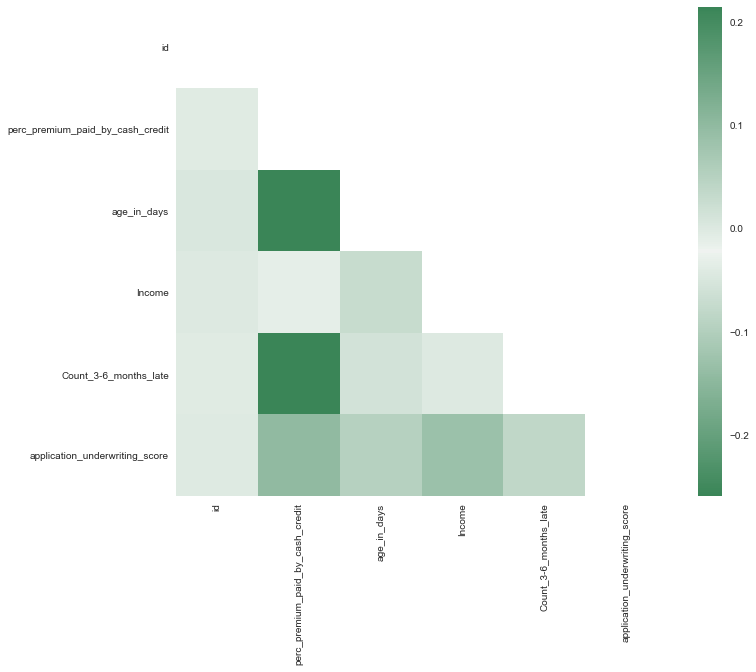

In [7]:
Insurance_data_continuous = Insurance_data.iloc[:,[0,1,2,3,4,7]]

corr = Insurance_data_continuous.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(500, 500, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap = cmap)

# consulted: https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e
# Gareth James, Trevor Hastie, Robert Tibshirani, Daniella Witten Introduction to statistical learning
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html


In [8]:
print('Fortunately, no continuous feature is highly correlated with each other')

Fortunately, no continuous feature is highly correlated with each other


## 3. Data Preprocessing:

In this step, the only operations was to check for null and empy string values. The data is very clean. 


In [9]:
# Dealing with missing values and duplicates

Insurance_data.drop_duplicates(inplace = True)

nan = float("NaN") 
Insurance_data.replace("", nan, inplace=True) # blank values present


# source:  https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

Insurance_data.dropna( inplace = True)
print(f'No NaNs?:  {all(Insurance_data.notnull())}\n') 


No NaNs?:  True



In [10]:
Insurance_data.head(5)

,id,perc_premium_paid_by_cash_credit,...,premium,target
0,110936,0.429,...,3300,1
1,41492,0.010,...,18000,1
2,31300,0.917,...,3300,0
3,19415,0.049,...,9600,1
4,99379,0.052,...,9600,1


In [11]:
Insurance_data['Income'] = Insurance_data['Income']/1000 # This is done to make the columns more readable since the numbers are big

## 4. Model Selection

Three models were selected for this project:

1. K-Nearest Neighbors 

2. Logistic regression

3. Decision Trees

The main idea it is to use simple models. No random forest or other ensemble models were used. The main purpose is to work with the features and the classes, not the models and its respective parameters.

In [12]:
y = Insurance_data.iloc[:,[-1]]
X = Insurance_data.iloc[:,1:-2]

In [13]:
### Encoding Nominal features:

nominal = X[['sourcing_channel','residence_area_type']]
nominal.columns
dummies = pd.concat([pd.get_dummies(X[i], dtype = int) for i in nominal.columns], axis = 1)


X = pd.concat([X.reset_index(drop = True), dummies.reset_index(drop = True)], axis = 1)

# consulted: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [14]:
X.drop(['sourcing_channel','residence_area_type'], axis = 1, inplace = True)

In [15]:
np.any(np.isnan(X))

False

## 4.1 Preliminary Models

Here, Preliminary models will be fitted and predicted using simple hyperparameter tuning for some of the models.

Feature improvement techniques such as scaling were only used in models that required it.



In [16]:
# Creating an empty dictionary to to store accuracies later.
Accuracies_KNN = {}
Accuracies_Log = {}
Accuracies_Tree = {}

### Logistic regression

In [17]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.30, random_state=56)

y_train_l = np.ravel(y_train_l)

# consulted: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

log_clf = LogisticRegression(max_iter = 200, n_jobs = -1)
log_clf.fit(X_train_l, y_train_l)
y_predict_l = log_clf.predict(X_test_l) 
accuracy_log = round(accuracy_score(y_test_l, y_predict_l)*100,3)

In [18]:
print(f'Accuracy for Logistic Regression Classifier {accuracy_log} %')
Accuracies_Log['Original'] = accuracy_log

Accuracy for Logistic Regression Classifier 93.815 %


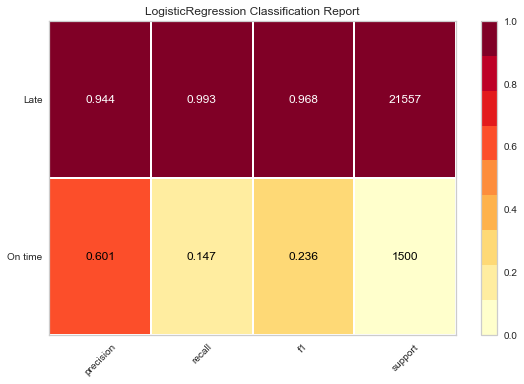

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [19]:
visualizer = ClassificationReport(log_clf, classes=['On time','Late'], support=True)

visualizer.fit(X_train_l, y_train_l)        
visualizer.score(X_test_l, y_test_l)        
visualizer.show()                 

# source : https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html


### KNN

In [20]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.30, random_state=156)

y_train_k = np.ravel(y_train_k)

### Scaling data. Creating an alternative dataset for KNN

Two types of scaling were used:

Min-Max Scaling with -1 to 1 and Standarization(Z-score). 


#### Before Scaling:

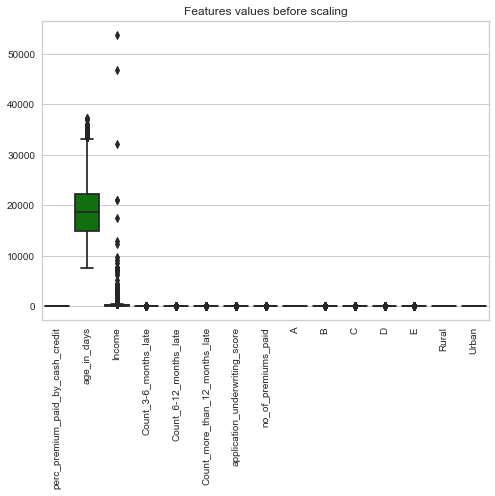

In [21]:
cols2 = pd.DataFrame(X_train_k)
cols2 = list(cols2.columns)
color = dict(boxes='blue', whiskers='DarkOrange', medians='black', caps='Gray')
title = 'Features Before Scaling'

#boxplot = X_train_k.boxplot(column = cols2, rot=90, fontsize=10, color = color, sym='r+')

ax = sns.boxplot(data=X, orient="v", color = 'green')
ax.set_xticklabels(cols2,rotation=90)
plt.title('Features values before scaling')
plt.show()

# consulted: https://seaborn.pydata.org/generated/seaborn.boxplot.html
# https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
# https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-box

#### After Scaling:


##### MinmaxScaling

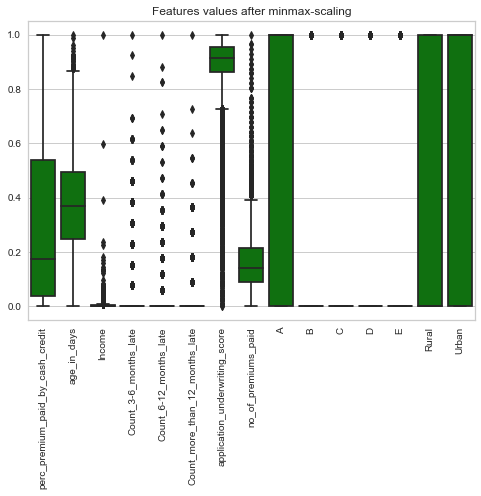

In [22]:
minmax_scaler =  MinMaxScaler(feature_range=(0, 1)) 
minmax_scaler.fit(X_train_k)
X_train_minmax = minmax_scaler.transform(X_train_k)
X_train_minmax = pd.DataFrame(X_train_minmax)
X_train_minmax.columns = X_train_k.columns
#ax = sns.boxplot(data=X_train_minmax, orient="h")

cols2 = pd.DataFrame(X_train_minmax)
cols2 = list(X_train_k.columns)

#boxplot = X_train_minmax.boxplot(column = cols2, rot=90, fontsize=10)

X_test_minmax = minmax_scaler.transform(X_test_k)


ax = sns.boxplot(data=X_train_minmax, orient="v", color = 'green')
ax.set_xticklabels(cols2,rotation=90)
plt.title('Features values after minmax-scaling')
plt.show()


#### Running the model with minmax scaling:

In [23]:
def knn_plot(X_train, X_test, scaling):
    
    n_neighbors = [i for i in range(3,20,2)]
    accuracy = []

    for k in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(X_train, y_train_k)
        y_predict_k = knn.predict(X_test)
        accuracy.append(accuracy_score(y_test_k, y_predict_k)*100)
    

    plt.plot(n_neighbors, accuracy, linestyle ='dashed', marker = 'o', color = 'green') 
    plt.xticks(n_neighbors)
    plt.title('Accuracies vs number of neighbors')
    plt.xlabel('number of neighbors k')
    plt.ylabel('Accuracy (in percentage)')

    plt.show()
    
    print(f'List of accuracies:\n{np.around(accuracy, 3)}\n') #https://www.kite.com/python/docs/numpy.around
    print(f'Optimal Accuracy:\n{round(max(accuracy),3)}%')
    Accuracies_KNN[scaling] = max(accuracy)
    
    

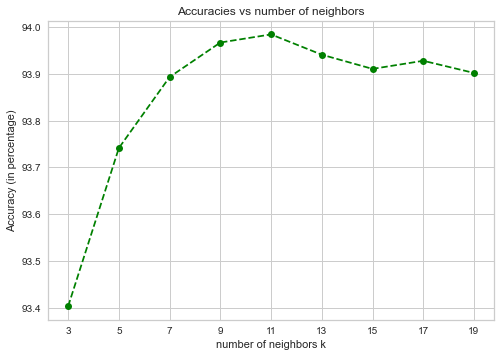

List of accuracies:
[93.403 93.742 93.893 93.967 93.984 93.941 93.911 93.928 93.902]

Optimal Accuracy:
93.984%


In [24]:
knn_plot(X_train_minmax, X_test_minmax, 'Min-Max Scaling')

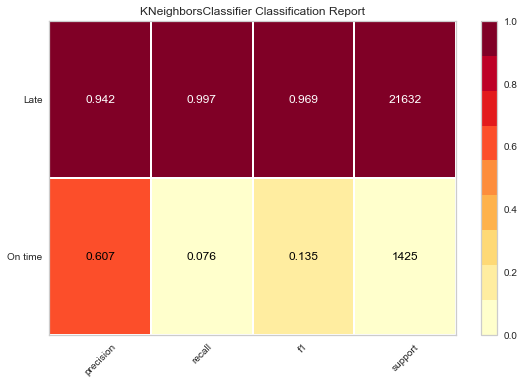

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [25]:
knn = KNeighborsClassifier(n_neighbors = 11)
visualizer = ClassificationReport(knn, classes=['On time','Late'], support=True)

visualizer.fit(X_train_minmax, y_train_k)        
visualizer.score(X_test_minmax, y_test_k)        
visualizer.show()                 


##### StandardScaling

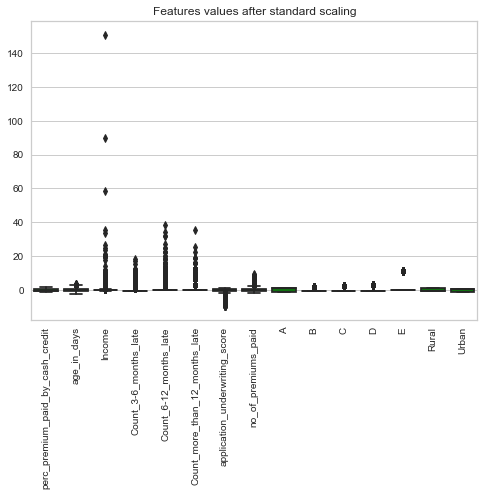

In [26]:
scaler =  StandardScaler() 
scaler.fit(X_train_k)
X_train_std = scaler.transform(X_train_k)
X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = X_train_k.columns
#ax = sns.boxplot(data=X_train_std, orient="h")

cols2 = pd.DataFrame(X_train_k)
cols2 = list(cols2.columns)


ax = sns.boxplot(data=X_train_std, orient="v", color = 'green')
ax.set_xticklabels(cols2,rotation=90)
plt.title('Features values after standard scaling')
plt.show()

#boxplot = X_train_std.boxplot(column=cols2, rot=90, fontsize=10)

X_test_std = scaler.transform(X_test_k)
X_test_std = pd.DataFrame(X_test_std)
X_test_std.columns = X_test_k.columns

#### Results after standard scaling

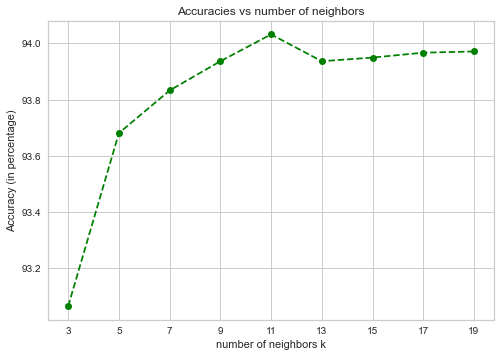

List of accuracies:
[93.065 93.681 93.833 93.937 94.032 93.937 93.95  93.967 93.971]

Optimal Accuracy:
94.032%


In [27]:
knn_plot(X_train_std, X_test_std, 'Standard Scaling')

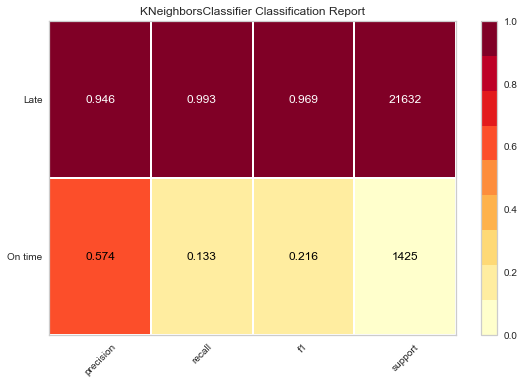

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [28]:
knn = KNeighborsClassifier(n_neighbors = 11)
visualizer = ClassificationReport(knn, classes=['On time','Late'], support=True)

visualizer.fit(X_train_std, y_train_k)        
visualizer.score(X_test_std, y_test_k)        
visualizer.show()                 


Using standard scaling resulted in a slight increase in accuracy. 

### Desicion tree

In [29]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.30, random_state=16)

y_train_d = np.ravel(y_train_d)

In [30]:
def tree_plot(X_train, X_test):
    
    n_nsamples = [i for i in range(2,220,10)]
    accuracy = []

    for n in n_nsamples:
        tree = DecisionTreeClassifier(min_samples_split = n)
        tree.fit(X_train_d, y_train_d)
        y_predict_d = tree.predict(X_test_d)
        accuracy.append(accuracy_score(y_test_d, y_predict_d)*100)
    
    # good source for matplotlib parameters: https://matplotlib.org/3.1.1/api/pyplot_summary.html
    plt.plot(n_nsamples, accuracy, linestyle ='dashed', marker = 'o', color = 'blue') # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    plt.xticks(n_nsamples)
    plt.title('Accuracies vs samples')
    plt.xlabel('number of samples')
    plt.ylabel('Accuracy (in percentage)')

    plt.show()
    
    print(f'List of accuracies:\n{np.around(accuracy, 3)}\n') #https://www.kite.com/python/docs/numpy.around
    print(f'Optimal Accuracy:\n{round(max(accuracy),3)}')
    Accuracies_Tree['Original'] = max(accuracy)

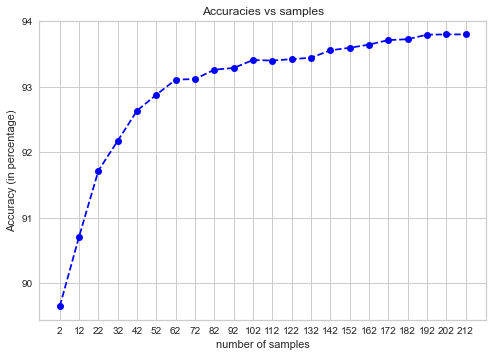

List of accuracies:
[89.652 90.714 91.721 92.176 92.636 92.879 93.108 93.117 93.26  93.286
 93.408 93.399 93.421 93.442 93.555 93.594 93.642 93.711 93.724 93.794
 93.798 93.798]

Optimal Accuracy:
93.798


In [31]:
tree_plot(X_train_d, X_test_d)

### Summary: 

The models performed relatively good for this particular study. Due to its high accuracy, there is not much room for improvement, but considering a production enviroment, any small increase on the accuracy ond the validation set it could be well worth it.
Knn with min-max scaling was the best performing model, however, the number of neighbors at which achieved maximum accuracy is relatively high. This indeed pose the problem of extensive computation. Logistic Regression was the second the second best performing model. The last model was Desition tree classifier.

Attempting to improve the model further...


## 5. Resampling Methods

There is an issue with class imbalance. Customers that pay their premium on time are far less that the ones that did not. This could potentially be adressed by balancing the classes.




In [32]:
y.describe() 

# attempting to train the model using two resampling techniques on the training set.

,target
count,76855.000000
mean,0.937805
std,0.241511
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


The mean of 0.937 clearly shows an imbalance on the dataset towards customers that paid their premiums (label 1).


### Dealing with class imbalance: Logistic Regression

In [33]:
# resampling the minority class  three different resampling methods

X_train_smote_l, y_train_smote_l = SMOTE(k_neighbors = 4,sampling_strategy='minority').fit_resample(X_train_l, y_train_l)
X_train_adasyn_l, y_train_adasyn_l = ADASYN(n_neighbors = 4,sampling_strategy='minority').fit_resample(X_train_l, y_train_l)
X_train_random_l, y_train_random_l = RandomOverSampler().fit_resample(X_train_l, y_train_l)


##### Testing three different resampling techniques:

In [34]:
log_clf = LogisticRegression(max_iter = 202, n_jobs = -1)
log_clf.fit(X_train_random_l, y_train_random_l, )
y_predict_l = log_clf.predict(X_test_l) 
accuracy_log = accuracy_score(y_test_l, y_predict_l)*100
print(f'Accuracy Random Sampling Logistic Regression: {round(accuracy_log,3)} %')
Accuracies_Log['Random Resampling'] = accuracy_log

log_clf = LogisticRegression(max_iter = 202, n_jobs = -1)
log_clf.fit(X_train_adasyn_l, y_train_adasyn_l)
y_predict_l = log_clf.predict(X_test_l) 
accuracy_log = accuracy_score(y_test_l, y_predict_l)*100
print(f'Accuracy ADASYN algorithm Logistic Regression: {round(accuracy_log,3)} %')
Accuracies_Log['ADASYN'] = accuracy_log

log_clf = LogisticRegression(max_iter = 202, n_jobs = -1)
log_clf.fit(X_train_smote_l, y_train_smote_l)
y_predict_l = log_clf.predict(X_test_l) 
accuracy_log = accuracy_score(y_test_l, y_predict_l)*100
print(f'Accuracy SMOTE algorithm Logistic Regression: {round(accuracy_log,3)} %')
Accuracies_Log['SMOTE'] = accuracy_log

Accuracy Random Sampling Logistic Regression: 80.535 %
Accuracy ADASYN algorithm Logistic Regression: 89.899 %
Accuracy SMOTE algorithm Logistic Regression: 89.804 %


For Logistic Regression. Resampling the minority class did not result in an improvement of the model

### Dealing with class imbalance: KNN

In [35]:
X_train_smote_k, y_train_smote_k = SMOTE(k_neighbors = 4,sampling_strategy='minority').fit_resample(X_train_std, y_train_k)
X_train_adasyn_k, y_train_adasyn_k = ADASYN(n_neighbors = 4,sampling_strategy='minority').fit_resample(X_train_std, y_train_k)
X_train_random_k, y_train_random_k = RandomOverSampler().fit_resample(X_train_std, y_train_k)

# Consulted:

# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#

##### Testing three different resampling techniques:

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1)
knn_clf.fit(X_train_random_k, y_train_random_k)
y_predict_k = knn_clf.predict(X_test_std) 
accuracy_k = accuracy_score(y_test_k, y_predict_k)*100
print(f'Accuracy Random Sampling Knn: {round(accuracy_k,3)} %')
Accuracies_KNN['Standard/Random Resampling'] = accuracy_k

knn_clf = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1)
knn_clf.fit(X_train_adasyn_k, y_train_adasyn_k)
y_predict_k = knn_clf.predict(X_test_std) 
accuracy_k = accuracy_score(y_test_k, y_predict_k)*100
print(f'Accuracy ADASYN algorithm Knn: {round(accuracy_k,3)} %')
Accuracies_KNN['Standard/ADASYN'] = accuracy_k

knn_clf = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1)
knn_clf.fit(X_train_smote_k, y_train_smote_k)
y_predict_k = knn_clf.predict(X_test_std) 
accuracy_k = accuracy_score(y_test_k, y_predict_k)*100
print(f'Accuracy SMOTE algorithm Knn: {round(accuracy_k,3)} %')
Accuracies_KNN['Standard/SMOTE'] = accuracy_k

Accuracy Random Sampling Knn: 78.067 %
Accuracy ADASYN algorithm Knn: 75.11 %
Accuracy SMOTE algorithm Knn: 76.736 %


For KNN. Resampling the minority class did not result in an improvement of the model.

### Dealing with class imbalance: Decision Trees




In [37]:
# resampling the minority class  three different resampling methods

X_train_smote, y_train_smote = SMOTE(k_neighbors = 4,sampling_strategy='minority').fit_resample(X_train_d, y_train_d)
X_train_adasyn, y_train_adasyn = ADASYN(n_neighbors = 4,sampling_strategy='minority').fit_resample(X_train_d, y_train_d)
X_train_random, y_train_random = RandomOverSampler().fit_resample(X_train_d, y_train_d)


#### Testing three different resampling techniques

In [38]:
tree_clf = DecisionTreeClassifier(min_samples_split = 202)
tree_clf.fit(X_train_random, y_train_random)
y_predict = tree_clf.predict(X_test_d) 
accuracy_log = accuracy_score(y_test_d, y_predict)*100
print(f'Accuracy Random Sampling Tree: {round(accuracy_log,3)} %')
Accuracies_Tree['Random Resampling'] = accuracy_log

tree_clf = DecisionTreeClassifier(min_samples_split = 202)
tree_clf.fit(X_train_adasyn, y_train_adasyn)
y_predict = tree_clf.predict(X_test_d) 
accuracy_log = accuracy_score(y_test_d, y_predict)*100
print(f'Accuracy ADASYN algorithm Tree: {round(accuracy_log,3)} %')
Accuracies_Tree['ADASYN'] = accuracy_log

tree_clf = DecisionTreeClassifier(min_samples_split = 202)
tree_clf.fit(X_train_smote, y_train_smote)
y_predict = tree_clf.predict(X_test_d) 
accuracy_log = accuracy_score(y_test_d, y_predict)*100
print(f'Accuracy SMOTE algorithm Tree: {round(accuracy_log,3)} %')
Accuracies_Tree['SMOTE'] = accuracy_log


Accuracy Random Sampling Tree: 78.215 %
Accuracy ADASYN algorithm Tree: 92.705 %
Accuracy SMOTE algorithm Tree: 92.866 %


For Decision Tree Classifier. Resampling the minority class did not result in an improvement of the model.

## 6. Feature Selection

### Feature importances - Shapley Additive Explanations (SHAP)

Feature importance algorithms and Shapley algorithms were used in order to determine the features that contribute the most to the model. That importance will be later used along with recursive feature elimination to select the best possible combination of features to use.

### Logistic Regression:

##### Exploring the features:

In [39]:
for i in X_train_l.columns:
    print (i)

perc_premium_paid_by_cash_credit
age_in_days
Income
Count_3-6_months_late
Count_6-12_months_late
Count_more_than_12_months_late
application_underwriting_score
no_of_premiums_paid
A
B
C
D
E
Rural
Urban


In [40]:
def shapley(x_train,x_test,y_train,y_test, algorithm):
  
    accuracies = []
    cols = []
    model = algorithm
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test) 
    complete_accuracy = accuracy_score(y_test, y_predict)*100
    
    for i in x_train.columns:
        cols.append(i)
        x_train_i = x_train.drop(i, axis = 1)
        x_test_i =  x_test.drop(i, axis = 1)
        model = algorithm
        model.fit(x_train_i, y_train)
        y_predict_i = model.predict(x_test_i) 
        accuracies.append(accuracy_score(y_test, y_predict_i)*100)
        
        
    delta =  complete_accuracy - np.array(accuracies)
    d = {cols[i] : delta[i] for i in range(len(cols))}
    max_delta = max(d, key=d.get) # low to high sort
    
    for col, acu in zip(cols, accuracies):
        print(f'Contribution of {col} for {algorithm}: {round(d[col],3)}%')
        print(f'Accuracy without {col}: accuracies {round(acu,3)}%')
        
   
       
    print(f'Total Accuracy: {round(complete_accuracy,3)}%')
    
# https://stackoverflow.com/questions/20230326/retrieve-dataframe-of-all-but-one-specified-column

In [41]:
shapley(X_train_l,X_test_l,y_train_l,y_test_l, LogisticRegression(max_iter = 200, n_jobs = -1))

Contribution of perc_premium_paid_by_cash_credit for LogisticRegression(max_iter=200, n_jobs=-1): 0.256%
Accuracy without perc_premium_paid_by_cash_credit: accuracies 93.559%
Contribution of age_in_days for LogisticRegression(max_iter=200, n_jobs=-1): 0.039%
Accuracy without age_in_days: accuracies 93.776%
Contribution of Income for LogisticRegression(max_iter=200, n_jobs=-1): -0.009%
Accuracy without Income: accuracies 93.824%
Contribution of Count_3-6_months_late for LogisticRegression(max_iter=200, n_jobs=-1): 0.052%
Accuracy without Count_3-6_months_late: accuracies 93.763%
Contribution of Count_6-12_months_late for LogisticRegression(max_iter=200, n_jobs=-1): 0.382%
Accuracy without Count_6-12_months_late: accuracies 93.434%
Contribution of Count_more_than_12_months_late for LogisticRegression(max_iter=200, n_jobs=-1): 0.095%
Accuracy without Count_more_than_12_months_late: accuracies 93.72%
Contribution of application_underwriting_score for LogisticRegression(max_iter=200, n_jobs

/opt/homebrew/Caskroom/miniforge/base/envs/datascience/lib/python3.9/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


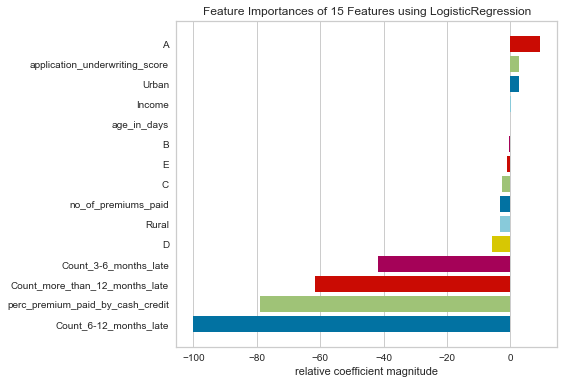

<AxesSubplot:title={'center':'Feature Importances of 15 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [42]:
model = LogisticRegression(max_iter=200, n_jobs=-1)
importances = FeatureImportances(model)
importances.fit(X_train_l, y_train_l)
importances.show()
# https://www.scikit-yb.org/en/latest/api/model_selection/importances.html

### Recursive Feature Elimination:

This technique will try the performance of the algorithm by recursively trying all the features. After the optimal number of features is found, the most important features will be selected and recursively tested. Features with no importance are not considered in the recursive test.

In [43]:
def recfe(target, data, algorithm):

    classifier = algorithm
    rfe = RFE(estimator=classifier, n_features_to_select= 1, step=1, verbose = 10)
    rfe.fit(data,target)
    optimal_features = rfe.n_features_

    print(f"Optimal number of features : {optimal_features}") 

In [44]:
def recfecv(target, data, algorithm):
    
    classifier = algorithm
    rfecv = RFECV(estimator=classifier, step=1, cv=KFold(12), scoring='accuracy', verbose = 10, n_jobs = -1)
    rfecv.fit(data,target)
    optimal_features = rfecv.n_features_

    print("Optimal number of features with Cross Validation is : %d" % rfecv.n_features_) 
    
    
    plt.figure()
    plt.title('Recursive Feature Elimination with 12 fold cross validation')
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, linestyle ='dashed', marker = 'o', color = 'blue')
    plt.show()
  # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html      

In [45]:
recfe(y_train_l,X_train_l, LogisticRegression(max_iter = 200, n_jobs = -1))

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Optimal number of features : 1


Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Optimal number of features with Cross Validation is : 3


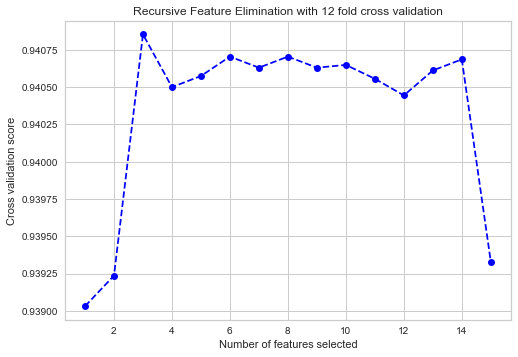

In [46]:
recfecv(y_train_l,X_train_l, LogisticRegression(max_iter = 200, n_jobs = -1))

In [47]:
# Using the best feature with Recursive feature elimination:

X_train_re_l = X_train_l['Count_3-6_months_late'].values.reshape(-1, 1)

X_test_re_l = X_test_l['Count_3-6_months_late'].values.reshape(-1, 1)

In [48]:
logclf = LogisticRegression(max_iter = 200, n_jobs = -1)
logclf.fit(X_train_re_l, y_train_l)
y_predict_f_l = logclf.predict(X_test_re_l)
accuracy_ref = round(accuracy_score(y_test_l, y_predict_f_l)*100,3)

In [49]:
print(f'Accuracy after feature selection after feature selection : {accuracy_ref } %') 

Accuracy after feature selection after feature selection : 93.451 %


In [50]:
# Using the best feature with Recursive feature elimination with 12 fold cross validation:

X_train_recv_l = X_train_l[['perc_premium_paid_by_cash_credit', 'Count_6-12_months_late','Count_more_than_12_months_late']].values

X_test_recv_l = X_test_l[['perc_premium_paid_by_cash_credit', 'Count_6-12_months_late','Count_more_than_12_months_late']].values

logclf = LogisticRegression(max_iter = 200, n_jobs = -1)
logclf.fit(X_train_recv_l, y_train_l)
y_predict_f_l = logclf.predict(X_test_recv_l)
accuracy_refcv = round(accuracy_score(y_test_l, y_predict_f_l)*100,3)

print(f'Accuracy after feature selection and recursive feature elimination with 12 fold cross-validation : {accuracy_refcv} %') 
Accuracies_Log['Recursive Feature Elimination'] = accuracy_refcv

Accuracy after feature selection and recursive feature elimination with 12 fold cross-validation : 93.802 %


No improvement was found but this will allow to reduce the computational time by selecting only 3 features.

### KNN:

##### Exploring the features:

In [51]:
shapley(X_train_std,X_test_std,y_train_k,y_test_k, KNeighborsClassifier(n_neighbors = 11, n_jobs = -1))

Contribution of perc_premium_paid_by_cash_credit for KNeighborsClassifier(n_jobs=-1, n_neighbors=11): 0.121%
Accuracy without perc_premium_paid_by_cash_credit: accuracies 93.911%
Contribution of age_in_days for KNeighborsClassifier(n_jobs=-1, n_neighbors=11): 0.052%
Accuracy without age_in_days: accuracies 93.98%
Contribution of Income for KNeighborsClassifier(n_jobs=-1, n_neighbors=11): 0.03%
Accuracy without Income: accuracies 94.002%
Contribution of Count_3-6_months_late for KNeighborsClassifier(n_jobs=-1, n_neighbors=11): 0.156%
Accuracy without Count_3-6_months_late: accuracies 93.876%
Contribution of Count_6-12_months_late for KNeighborsClassifier(n_jobs=-1, n_neighbors=11): 0.252%
Accuracy without Count_6-12_months_late: accuracies 93.781%
Contribution of Count_more_than_12_months_late for KNeighborsClassifier(n_jobs=-1, n_neighbors=11): 0.121%
Accuracy without Count_more_than_12_months_late: accuracies 93.911%
Contribution of application_underwriting_score for KNeighborsClassif

### Recursive Feature Elimination: 

Knn does not provide feature importance information in order to perform recursive feature elimination

In [52]:
X_test_std

,perc_premium_paid_by_cash_credit,age_in_days,...,Rural,Urban
0,-0.271981,-0.462910,...,-0.810087,0.810087
1,-0.955608,-0.819595,...,-0.810087,0.810087
2,-0.813438,-1.105924,...,1.234436,-1.234436
3,1.122495,-0.532679,...,-0.810087,0.810087
4,1.361462,-1.536103,...,-0.810087,0.810087
...,...,...,...,...,...
23052,-0.934434,-1.462806,...,1.234436,-1.234436
23053,0.647587,-0.390984,...,-0.810087,0.810087
23054,0.571964,-0.318667,...,1.234436,-1.234436
23055,0.263425,-1.034391,...,1.234436,-1.234436


In [53]:
# Using the best features after performing recursive SHAP:

X_train_shap_k = X_train_std['Count_6-12_months_late'].values
X_train_shap_k = X_train_shap_k.reshape(-1, 1)

X_test_shap_k = X_test_std['Count_6-12_months_late'].values
X_test_shap_k= X_test_shap_k.reshape(-1, 1)

In [54]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
knn.fit(X_train_shap_k, y_train_k)
y_predict_f_k = knn.predict(X_test_shap_k)
accuracy_shap = round(accuracy_score(y_test_k, y_predict_f_k)*100,3)

In [55]:
print(f'Accuracy after feature selection using Shapley : {accuracy_shap} %') 
Accuracies_KNN['Standard/Shapley'] =  accuracy_shap

Accuracy after feature selection using Shapley : 93.854 %


Accuracy for this model did not improved when using all the features together. It performed slightly worse

### Decision Tree:

##### Exploring the features:

In [56]:
for i in X_train_d.columns:
    print (i)

perc_premium_paid_by_cash_credit
age_in_days
Income
Count_3-6_months_late
Count_6-12_months_late
Count_more_than_12_months_late
application_underwriting_score
no_of_premiums_paid
A
B
C
D
E
Rural
Urban


In [57]:
shapley(X_train_d,X_test_d,y_train_d,y_test_d, DecisionTreeClassifier(min_samples_split = 202))


Contribution of perc_premium_paid_by_cash_credit for DecisionTreeClassifier(min_samples_split=202): -0.017%
Accuracy without perc_premium_paid_by_cash_credit: accuracies 93.815%
Contribution of age_in_days for DecisionTreeClassifier(min_samples_split=202): -0.039%
Accuracy without age_in_days: accuracies 93.837%
Contribution of Income for DecisionTreeClassifier(min_samples_split=202): -0.035%
Accuracy without Income: accuracies 93.833%
Contribution of Count_3-6_months_late for DecisionTreeClassifier(min_samples_split=202): 0.022%
Accuracy without Count_3-6_months_late: accuracies 93.776%
Contribution of Count_6-12_months_late for DecisionTreeClassifier(min_samples_split=202): 0.204%
Accuracy without Count_6-12_months_late: accuracies 93.594%
Contribution of Count_more_than_12_months_late for DecisionTreeClassifier(min_samples_split=202): 0.043%
Accuracy without Count_more_than_12_months_late: accuracies 93.755%
Contribution of application_underwriting_score for DecisionTreeClassifier(m

The most important feature for this particular classifier is Count_6-12_months_late. The ausence of this featgure produces the highest drop in accuracy.


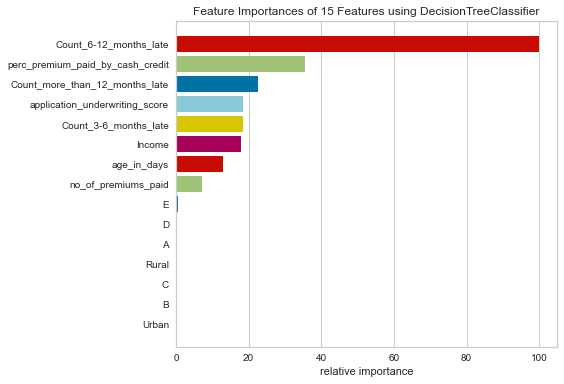

<AxesSubplot:title={'center':'Feature Importances of 15 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [58]:
model = DecisionTreeClassifier(min_samples_split = 202)
importances = FeatureImportances(model)
importances.fit(X_train_d, y_train_d)
importances.show()
# https://www.scikit-yb.org/en/latest/api/model_selection/importances.html

### Recursive Feature Elimination:

This technique will try the performance of the algorithm by resursively trying all the features. After the optimal number of features is found, the most important features will be selected and recursively tested. 

In [59]:
def recfe(target, data, algorithm):

    classifier = algorithm
    rfe = RFE(estimator=classifier, n_features_to_select= 1, step=1, verbose = 10) 
    rfe.fit(data,target)
    optimal_features = rfe.n_features_

    print(f"Optimal number of features using recursive feature elimination : {rfe.n_features_}") 


In [60]:
recfe(y_train_d,X_train_d, DecisionTreeClassifier(min_samples_split = 202))

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Optimal number of features using recursive feature elimination : 1


Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Optimal number of features with Cross Validation is : 1


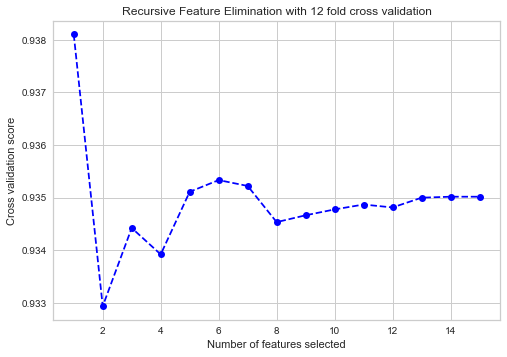

In [61]:
recfecv(y_train_d,X_train_d, DecisionTreeClassifier(min_samples_split = 202))

In [62]:
# using the best features with recursive feature elimination and 12 fold cross validation:


X_train_ref_d = X_train_d['Count_6-12_months_late'].values
X_train_ref_d = X_train_ref_d.reshape(-1, 1)

X_test_ref_d = X_test_d['Count_6-12_months_late'].values
X_test_ref_d= X_test_ref_d.reshape(-1, 1)

In [63]:
tree = DecisionTreeClassifier(min_samples_split = 202)
tree.fit(X_train_ref_d, y_train_d)
y_predict_f_d = tree.predict(X_test_ref_d)
accuracy_ref = round(accuracy_score(y_test_d, y_predict_f_d)*100,3)

In [64]:
print(f'Accuracy after feature selection : {accuracy_ref } %') 
Accuracies_Tree['Recursive Feature Elimination'] = accuracy_ref

Accuracy after feature selection : 94.154 %


In this case, accuracy improved from 93.80% to 94.15%. The improvement is minimal but it is consistent with two of the models for which recursive feature elimination was applied.

## 6. Feature construction:

So far, the accuracy has been slightly improved. Now, the possible combinations of feature engineering techniques are endless. In consequence, if the accuracy was improved for a particular model after appliying a previous feature engineering technique, that configuration was chosen and improved upon other methods. 

#### Using Polynomial Features

### Logistic Regression

In [65]:
# Note, This process will not be done in a loop doe to the time it takes to work with 3 and 4 degree polynomial
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly4 = PolynomialFeatures(4)

In [66]:
# working with polynomial features degree 2
X_train_l_poly2 = poly2.fit_transform(X_train_recv_l)
X_test_l_poly2 = poly2.transform(X_test_recv_l)


In [67]:
# working with polynomial features degree 3
X_train_l_poly3 = poly3.fit_transform(X_train_recv_l)
X_test_l_poly3 = poly3.transform(X_test_recv_l)

In [68]:
# working with polynomial features degree 4
X_train_l_poly4 = poly4.fit_transform(X_train_recv_l)
X_test_l_poly4 = poly4.transform(X_test_recv_l)

In [69]:
logclf = LogisticRegression(max_iter = 200, n_jobs = -1)
logclf.fit(X_train_l_poly2, y_train_l)
y_predict_l = logclf.predict(X_test_l_poly2)
accuracy_poly2 = round(accuracy_score(y_test_l, y_predict_l)*100,3)
print(f'Logistic Regression Accuracy after applying polynomial feafures with degree 2 : {accuracy_poly2 } %') 
Accuracies_Log['2 Degree Construction/RECFE'] = accuracy_poly2

Logistic Regression Accuracy after applying polynomial feafures with degree 2 : 93.763 %


In [70]:
logclf = LogisticRegression(max_iter = 200, n_jobs = -1)
logclf.fit(X_train_l_poly3, y_train_l)
y_predict_l = logclf.predict(X_test_l_poly3)
accuracy_poly3 = round(accuracy_score(y_test_l, y_predict_l)*100,3)
print(f'Logistic Regression Accuracy after applying polynomial feafures with degree 3 : {accuracy_poly3} %') 
Accuracies_Log['3 Degree Construction/RECFE'] = accuracy_poly3

Logistic Regression Accuracy after applying polynomial feafures with degree 3 : 93.737 %


In [71]:
logclf = LogisticRegression(max_iter = 200, n_jobs = -1)
logclf.fit(X_train_l_poly4, y_train_l)
y_predict_l = logclf.predict(X_test_l_poly4)
accuracy_poly4 = round(accuracy_score(y_test_l, y_predict_l)*100,3)
print(f'Logistic Regression Accuracy after applying polynomial feafures with degree 4 : {accuracy_poly4 } %')
Accuracies_Log['3 Degree Construction/RECFE'] = accuracy_poly4

Logistic Regression Accuracy after applying polynomial feafures with degree 4 : 93.737 %


In this case, accuracy did not improved 

### KNN

In [72]:
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly4 = PolynomialFeatures(3)

In [73]:
# working with polynomial features degree 2
X_train_k_poly2 = poly2.fit_transform(X_train_std)
X_test_k_poly2 = poly2.transform(X_test_std)

In [74]:
# working with polynomial features degree 3
X_train_k_poly3 = poly3.fit_transform(X_train_std)
X_test_k_poly3 = poly3.transform(X_test_std)

In [75]:
# working with polynomial features degree 4
X_train_k_poly4 = poly4.fit_transform(X_train_std)
X_test_k_poly4 = poly4.transform(X_test_std)

In [76]:
knn = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1)
knn.fit(X_train_k_poly2, y_train_k)
y_predict_k = knn.predict(X_test_k_poly2)
accuracy_poly2 = round(accuracy_score(y_test_k, y_predict_k)*100,3)
print(f'KNN Accuracy after applying polynomial feafures with degree 2 : {accuracy_poly2 } %') 
Accuracies_KNN['2 Degree Construction/Standard'] = accuracy_poly2

KNN Accuracy after applying polynomial feafures with degree 2 : 93.976 %


In [77]:
knn = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1)
knn.fit(X_train_k_poly3, y_train_k)
y_predict_k = knn.predict(X_test_k_poly3)
accuracy_poly3 = round(accuracy_score(y_test_k, y_predict_k)*100,3)
print(f'KNN Accuracy after applying polynomial feafures with degree 3 : {accuracy_poly3} %') 
Accuracies_KNN['3 Degree Construction/Standard'] = accuracy_poly3

KNN Accuracy after applying polynomial feafures with degree 3 : 93.95 %


In [78]:
knn = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1)
knn.fit(X_train_k_poly4, y_train_k)
y_predict_k = knn.predict(X_test_k_poly4)
accuracy_poly4 = round(accuracy_score(y_test_k, y_predict_k)*100,3)
print(f'KNN Accuracy after applying polynomial feafures with degree 4 : {accuracy_poly4 } %') 
Accuracies_KNN['3 Degree Construction/Standard'] = accuracy_poly3

KNN Accuracy after applying polynomial feafures with degree 4 : 93.95 %


For this classifier, the accuracy did not improved at all.

### Decision Trees:

In [79]:
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly4 = PolynomialFeatures(3)

In [80]:
# working with polynomial features degree 2
X_train_d_poly2 = poly2.fit_transform(X_train_ref_d)
X_test_d_poly2 = poly2.transform(X_test_ref_d)


In [81]:
# working with polynomial features degree 3
X_train_d_poly3 = poly3.fit_transform(X_train_ref_d)
X_test_d_poly3 = poly3.transform(X_test_ref_d)

In [82]:
# working with polynomial features degree 4
X_train_d_poly4 = poly4.fit_transform(X_train_ref_d)
X_test_d_poly4 = poly4.transform(X_test_ref_d)

In [83]:
tree = DecisionTreeClassifier(min_samples_split = 202)
tree.fit(X_train_d_poly2, y_train_d)
y_predict_d = tree.predict(X_test_d_poly2)
accuracy_poly2 = round(accuracy_score(y_test_d, y_predict_d)*100,3)
print(f'Desicion Tree Accuracy after appliying polynomial feafures with degree 2 : {accuracy_poly2 } %') 
Accuracies_Tree['2 Degree Construction\RECFE'] = accuracy_poly2

Desicion Tree Accuracy after appliying polynomial feafures with degree 2 : 94.154 %


In [84]:
tree = DecisionTreeClassifier(min_samples_split = 202)
tree.fit(X_train_d_poly3, y_train_d)
y_predict_d = tree.predict(X_test_d_poly3)
accuracy_poly3 = round(accuracy_score(y_test_d, y_predict_d)*100,3)
print(f'Desicion Tree Accuracy after appliying polynomial feafures with degree 3 : {accuracy_poly3 } %') 
Accuracies_Tree['3 Degree Construction\RECFE'] = accuracy_poly2

Desicion Tree Accuracy after appliying polynomial feafures with degree 3 : 94.154 %


In [85]:
tree = DecisionTreeClassifier(min_samples_split = 202)
tree.fit(X_train_d_poly4, y_train_d)
y_predict_d = tree.predict(X_test_d_poly4)
accuracy_poly4 = round(accuracy_score(y_test_d, y_predict_d)*100,3)
print(f'Desicion Tree Accuracy after appliying polynomial feafures with degree 4 : {accuracy_poly4 } %') 
Accuracies_Tree['4 Degree Construction\RECFE'] = accuracy_poly2

Desicion Tree Accuracy after appliying polynomial feafures with degree 4 : 94.154 %


In this case, accuracy did not improve when using polynomial features. It remained the same 

In [86]:
# consulted:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# (Ozdemir, Susarla) Feature engeneering made easy

## 7. Feature Transformation

#### Principal component analysis:

As an alternative to recursive feature elimination, Principal Component Analysis was used to reduce the number of features. This approach is obviously not cummulative with recursive feature elimination approach.

## Logistic Regression

In [87]:
def pca_accuracies(ncomponents, X_train, X_test, y_train, y_test, algorithm):
    components = range(1,ncomponents+1)
    accuracy_pca = []
    for c in components:
        pca = PCA(n_components=c)
        pca.fit(X_train_d)
        X_train_pca = pca.transform(X_train) 
        X_test_pca = pca.transform(X_test)
        clf = algorithm
        clf.fit(X_train_pca, y_train)
        y_predict = clf.predict(X_test_pca)
        accuracy_pca.append(round(accuracy_score(y_test, y_predict)*100,3))

    plt.plot(components, accuracy_pca, linestyle ='dashed', marker = 'o', color = 'purple') 
    plt.xticks(components)
    plt.title('Number of components vs Accuracy')
    plt.xlabel('Number of Components')
    plt.ylabel('Accuracy (in percentage)')

    plt.show()
    

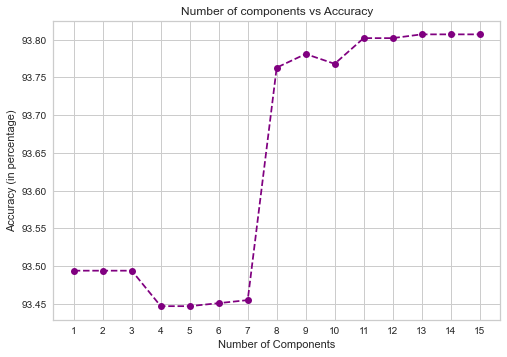

In [88]:
pca_accuracies(15,X_train_l, X_test_l, y_train_l, y_test_l, LogisticRegression(max_iter = 200, n_jobs = -1) )

In [89]:
# consulted: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# (Ozdemir, Susarla) Feature engeneering made easy

In [90]:
pca = PCA(n_components=15)
pca.fit(X_train_l)
X_train_l_pca = pca.transform(X_train_l) 
X_test_l_pca = pca.transform(X_test_l) 

In [91]:
print(pca.explained_variance_ratio_)

[9.93296033e-01 6.70291733e-03 9.56327276e-07 2.06211677e-08
 1.82536243e-08 1.78827753e-08 1.25388304e-08 6.69810058e-09
 6.56697330e-09 4.15786666e-09 3.33345122e-09 3.04815678e-09
 3.66331777e-10 2.92377722e-37 6.21272021e-40]


In [92]:
logclf = LogisticRegression(max_iter = 200, n_jobs = -1)
logclf.fit(X_train_l_pca, y_train_l)
y_predict_l = logclf.predict(X_test_l_pca)
accuracy_pca = round(accuracy_score(y_test_l, y_predict_l)*100,3)
print(f'Accuracy after using pca with 15 component : {accuracy_pca} %') 
Accuracies_Log['PCA'] = accuracy_pca

Accuracy after using pca with 15 component : 93.824 %


#### Linear Discriminant Analysis:


In [93]:
def lda(x_train,x_test, y_train, y_test, algorithm):
    lda = LinearDiscriminantAnalysis(n_components=1)
    lda.fit(x_train, y_train)
    x_train = lda.transform(x_train) 
    x_test = lda.transform(x_test)
    tree = algorithm
    tree.fit(x_train, y_train)
    y_predict = tree.predict(x_test)
    accuracy_lda = round(accuracy_score(y_test, y_predict)*100,3)
    
    return accuracy_lda

In [94]:
# using linear discriminant analysis with results from one component PCA

print(f'Logistic Regression Accuracy after using lda from from pca : {lda(X_train_l_pca,X_test_l_pca, y_train_l, y_test_l, LogisticRegression(max_iter = 200, n_jobs = -1))} %')
Accuracies_Log['PCA\LDA'] = lda(X_train_l_pca,X_test_l_pca, y_train_l, y_test_l, LogisticRegression(max_iter = 200, n_jobs = -1)) 

Logistic Regression Accuracy after using lda from from pca : 93.837 %


In [95]:
# using linear discriminant analysis with results from one from best feature using recursive feature elimination

In [96]:
print(f'Logistic Regression Accuracy after using lda from best feature using recursive feature elimination : {lda(X_train_recv_l,X_test_recv_l, y_train_l, y_test_l,LogisticRegression(max_iter = 200, n_jobs = -1))} %') 

Logistic Regression Accuracy after using lda from best feature using recursive feature elimination : 93.763 %


In [97]:
print(f'Logistic Regression Accuracy after using lda from best feature using recursive feature elimination and polynomial features degree 2: {lda(X_train_l_poly2,X_test_l_poly2, y_train_l, y_test_l,LogisticRegression(max_iter = 200, n_jobs = -1))} %')
Accuracies_Log['RECFE\LDA\poly2'] = lda(X_train_l_poly2,X_test_l_poly2, y_train_l, y_test_l,LogisticRegression(max_iter = 200, n_jobs = -1)) 

Logistic Regression Accuracy after using lda from best feature using recursive feature elimination and polynomial features degree 2: 93.802 %


Using linear discriminant analysis after peroforming recursive feature elimination managed to slightly improve the model fro 93.815% to 93.837%.

using LDA with PCA also magaged to improve the model. From 93.815% to 93.824%





## KNN

#### Principal component analysis:

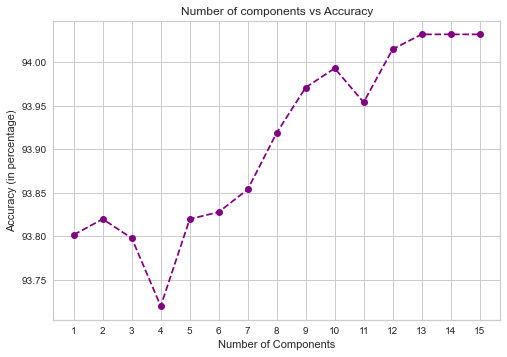

In [98]:
pca_accuracies(15,X_train_std, X_test_std, y_train_k, y_test_k, KNeighborsClassifier(n_neighbors = 11, n_jobs = -1))

In [99]:
pca = PCA(n_components=13)
pca.fit(X_train_std)
X_train_k_pca = pca.transform(X_train_std) 
X_test_k_pca = pca.transform(X_test_std) 

In [100]:
print(pca.explained_variance_ratio_)

[0.1333567  0.12817138 0.10674336 0.0897227  0.08403884 0.07571956
 0.07358071 0.0674822  0.06001394 0.05169335 0.0474394  0.04439602
 0.03764184]


In [101]:
# using linear discriminant analysis with results from one component PCA

print(f'KNN Accuracy after using lda from from pca : {lda(X_train_k_pca,X_test_k_pca, y_train_k, y_test_k, KNeighborsClassifier(n_neighbors = 11, n_jobs = -1))} %')
Accuracies_KNN['PCA\LDA\Standard'] = lda(X_train_k_pca,X_test_k_pca, y_train_k, y_test_k, KNeighborsClassifier(n_neighbors = 11, n_jobs = -1))

KNN Accuracy after using lda from from pca : 93.88 %


The accuracy for this approach did not improved.

## Decision Tree

#### Principal component analysis:

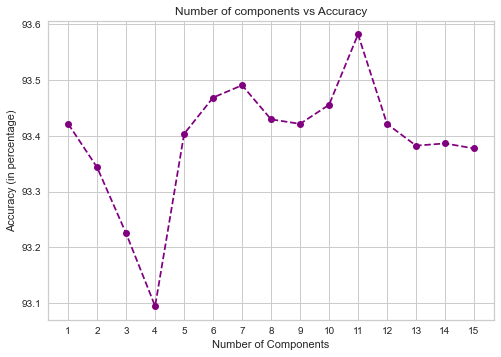

In [102]:
pca_accuracies(15,X_train_d, X_test_d, y_train_d, y_test_d, DecisionTreeClassifier(min_samples_split = 202))

In [103]:
pca = PCA(n_components=11)
pca.fit(X_train_d)
X_train_d_pca = pca.transform(X_train_d) 
X_test_d_pca = pca.transform(X_test_d) 

In [104]:
print(pca.explained_variance_ratio_)

[9.97060401e-01 2.93854730e-03 9.57597347e-07 2.05666566e-08
 1.83307655e-08 1.76919266e-08 1.25520563e-08 7.08356532e-09
 6.65039625e-09 4.21396867e-09 3.38070747e-09]


In [105]:
# using linear discriminant analysis with results from one component PCA

print(f'Decision Tree Accuracy after using lda from from pca : {lda(X_train_d_pca,X_test_d_pca, y_train_d, y_test_d, DecisionTreeClassifier(min_samples_split = 202))} %') 
Accuracies_Tree['PCA\LDA'] = lda(X_train_d_pca,X_test_d_pca, y_train_d, y_test_d, DecisionTreeClassifier(min_samples_split = 202))
print(f'Decision Tree Accuracy after using lda from from recursive feature elimination : {lda(X_train_ref_d,X_test_ref_d, y_train_d, y_test_d, DecisionTreeClassifier(min_samples_split = 202))} %')
Accuracies_Tree['RECFE\LDA'] = lda(X_train_ref_d,X_test_ref_d, y_train_d, y_test_d, DecisionTreeClassifier(min_samples_split = 202))

Decision Tree Accuracy after using lda from from pca : 93.559 %
Decision Tree Accuracy after using lda from from recursive feature elimination : 94.154 %


This model, after performing linear discriminant analysis, did not improved the accuracy of the model at all.

## 8 Feature Learning:

## Logistic Regression

In [106]:
def rbm(x_train,x_test, y_train, y_test, algorithm, n_iter = 100, n_components = 256):
    rmb = BernoulliRBM(random_state = 10, n_iter = n_iter, n_components = n_components)
    rmb.fit(x_train)
    x_train_r = rmb.transform(x_train) 
    x_test_r = rmb.transform(x_test)
    clf = algorithm
    clf.fit(x_train_r, y_train)
    y_predict = clf.predict(x_test_r)
    accuracy_rbm = round(accuracy_score(y_test, y_predict)*100,3)
    print(f"Accurary for {algorithm}: {accuracy_rbm}") 
    return accuracy_rbm

# consulted: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html
# (Ozdemir, Susarla) Feature engeneering made easy

In [107]:
# Using PCA Results:

In [108]:
rbm_pca = rbm(X_train_l_pca,X_test_l_pca, y_train_l, y_test_l,LogisticRegression(max_iter = 200, n_jobs = -1))
Accuracies_Log['RBM\PCA'] = rbm_pca

Accurary for LogisticRegression(max_iter=200, n_jobs=-1): 93.494


In [109]:
# Using Recursive Feature Elimination Results:

In [110]:
rbm_recv = rbm(X_train_recv_l,X_test_recv_l, y_train_l, y_test_l, LogisticRegression(max_iter = 200, n_jobs = -1))
Accuracies_Log['RBM\RECFE'] = rbm_recv

Accurary for LogisticRegression(max_iter=200, n_jobs=-1): 93.499


In [111]:
X_train_l_poly2 = poly2.fit_transform(X_train_recv_l)
X_test_l_poly2 = poly2.transform(X_test_recv_l)

rbm_recv_poly2 = rbm(X_train_l_poly2, X_test_l_poly2, y_train_l, y_test_l, LogisticRegression(max_iter = 200, n_jobs = -1))

Accuracies_Log['2 Degree RBM\RECFE'] = rbm_recv_poly2



Accurary for LogisticRegression(max_iter=200, n_jobs=-1): 93.624


## KNN

In [112]:
# Using PCA Results: 

In [113]:
rbm_knn = rbm(X_train_k_pca,X_test_k_pca, y_train_k, y_test_k,KNeighborsClassifier(n_neighbors = 11, n_jobs = -1))
Accuracies_KNN['RBM\PCA\Standard'] = rbm_knn

Accurary for KNeighborsClassifier(n_jobs=-1, n_neighbors=11): 93.82


## Decision Tree

In [114]:
# Using PCA Results:

In [115]:
rbm_tree_pca = rbm(X_train_d_pca,X_test_d_pca, y_train_d, y_test_d,DecisionTreeClassifier(min_samples_split = 202))
Accuracies_Tree['RMB\PCA'] = rbm_tree_pca

Accurary for DecisionTreeClassifier(min_samples_split=202): 94.071


In [116]:
# Using Recursive Feature Elimination Results:

In [117]:
rbm_tree_recv = rbm(X_train_ref_d,X_test_ref_d, y_train_d, y_test_d, DecisionTreeClassifier(min_samples_split = 202))
Accuracies_Tree['RMB\RECFE'] = rbm_tree_recv

Accurary for DecisionTreeClassifier(min_samples_split=202): 94.071


### Summary of results:

Pargraph and Table with technique and accuracy results:



In [118]:
#list(Accuracies_KNN.keys())
#list(Accuracies_KNN.values())
sorted(list(Accuracies_KNN.values()))

[75.10951121134579,
 76.73591534024375,
 78.06739818710153,
 93.82,
 93.854,
 93.88,
 93.95,
 93.976,
 93.98447326191612,
 94.03218111636379]

##### Detailed Results

In [119]:
def accuracy_ranking(techniques, accuracies, algorithm, color = "flare"):
    
    data = {'Techniques': techniques, 'Accuracies': accuracies}
    data_alg = pd.DataFrame(data = data)
    data_alg = round(data_alg.sort_values(by = ['Accuracies']),3)
    #plt.bar(data_knn['Techniques'],data_knn['Accuracies'], color = 'green' )
    
    ax = sns.barplot(x='Techniques', y='Accuracies', palette = color, data = data_alg)
    plt.title(f'Performance ranking of {algorithm} algorithm with different feature engineering techniques')
    plt.xticks(rotation = 90)
    plt.ylabel('Accuracy (percentage)')
    plt.xlabel('Techniques')
    plt.ylim([70,95])
    plt.show()
    return data_alg
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
# https://stackabuse.com/rotate-axis-labels-in-matplotlib/
# https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/
# https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python
# https://www.geeksforgeeks.org/rotate-axis-tick-labels-in-seaborn-and-matplotlib/
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://seaborn.pydata.org/generated/seaborn.color_palette.html

#### KNN

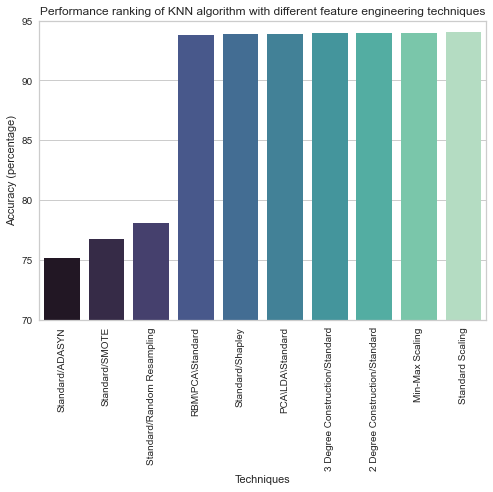

,Techniques,Accuracies
3,Standard/ADASYN,75.110
4,Standard/SMOTE,76.736
2,Standard/Random Resampling,78.067
9,RBM\PCA\Standard,93.820
5,Standard/Shapley,93.854
8,PCA\LDA\Standard,93.880
7,3 Degree Construction/Standard,93.950
6,2 Degree Construction/Standard,93.976
0,Min-Max Scaling,93.984
1,Standard Scaling,94.032


In [120]:
accuracy_ranking(list(Accuracies_KNN.keys()),list(Accuracies_KNN.values()), 'KNN', color = 'mako')

Overall accuracy when using KNN classifier for this dataset did not improve. Standard scaling resulted to be slightly better than Min-Max Scaling, but the differences are very small that they may be not statistically significant.

#### Logistic Regression

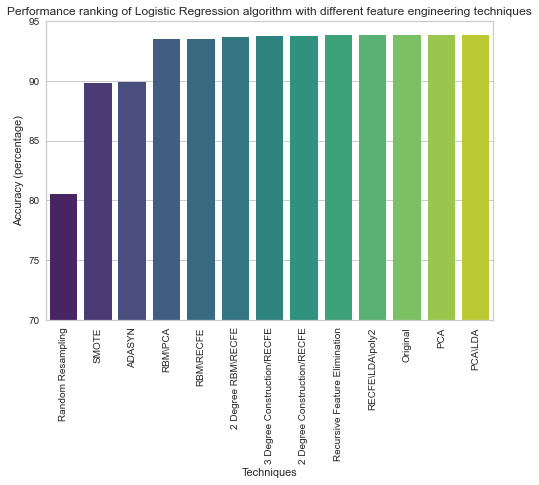

,Techniques,Accuracies
1,Random Resampling,80.535
3,SMOTE,89.804
2,ADASYN,89.899
10,RBM\PCA,93.494
11,RBM\RECFE,93.499
12,2 Degree RBM\RECFE,93.624
6,3 Degree Construction/RECFE,93.737
5,2 Degree Construction/RECFE,93.763
4,Recursive Feature Elimination,93.802
9,RECFE\LDA\poly2,93.802


In [121]:

accuracy_ranking(list(Accuracies_Log.keys()),list(Accuracies_Log.values()), 'Logistic Regression', color = 'viridis')

Overall accuracy when using Logistic Regression classifier showed a slight improvement when using some combination of techniques. PCA and PCA with linear discriminant analysis in order to further reduce number of features, managed to improved accuracy. However, it is highly possible that this improvement is not statistically significant.

#### Decision Tree

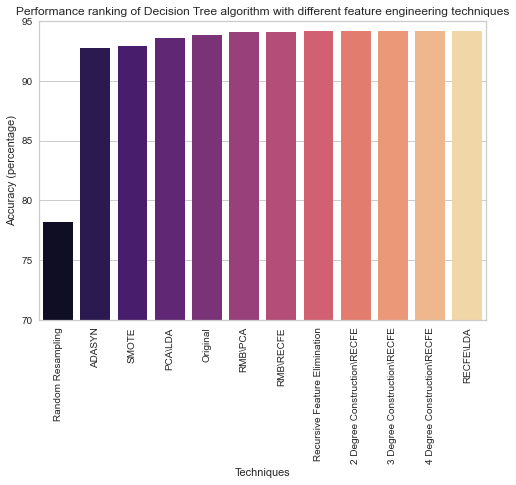

,Techniques,Accuracies
1,Random Resampling,78.215
2,ADASYN,92.705
3,SMOTE,92.866
8,PCA\LDA,93.559
0,Original,93.798
10,RMB\PCA,94.071
11,RMB\RECFE,94.071
4,Recursive Feature Elimination,94.154
5,2 Degree Construction\RECFE,94.154
6,3 Degree Construction\RECFE,94.154


In [122]:
accuracy_ranking(list(Accuracies_Tree.keys()),list(Accuracies_Tree.values()), 'Decision Tree', color = 'magma')

Overall accuracy when using Decision Tree classifier also showed a slight improvement when using some combination of feature engineering techniques. Again, in this case, the modest improvement in accuracy it is probably not significant.



## Conclusions:

1. Improvement in accuracy was very modest. 


2. The improvement was greater for lower initial accuracy.


3. Feature engineering should work better in conjunction with different  model improvement techniques.


4. Domain knowledge could play an important role in selecting or building features. For example, adding new features that new research shows that its introduction to the model will greatly affect the classification/regression results.


5. There seems to be no pattern for a right combination of techniques. 


6. PCA and recursive feature elimination performance was decent; but their most relevant contribution is the reduction of features without lossing significant performance while considerably reducing computational time.


### References and Consulted Sources

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

https://www.statisticssolutions.com/assumptions-of-logistic-regression/

https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e

Gareth James, Trevor Hastie, Robert Tibshirani, Daniella Witten Introduction to statistical learning

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-box

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#

https://stackoverflow.com/questions/20230326/retrieve-dataframe-of-all-but-one-specified-column

https://www.scikit-yb.org/en/latest/api/model_selection/importances.html

https://www.scikit-yb.org/en/latest/api/model_selection/importances.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://stackabuse.com/rotate-axis-labels-in-matplotlib/

https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/

https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python

https://www.geeksforgeeks.org/rotate-axis-tick-labels-in-seaborn-and-matplotlib/

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://seaborn.pydata.org/generated/seaborn.color_palette.html
